In [1]:
# --------------------------------------------
# Experiment 3: Image Classification using CNN
# --------------------------------------------

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random

In [3]:
# b. Load and Preprocess Data (MNIST dataset)
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Train set shape:", X_train.shape)   # (60000, 28, 28)
print("Test set shape:", X_test.shape)     # (10000, 28, 28)

Train set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [6]:
# Normalize values to [0,1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [7]:
# Reshape to (n_samples, 28, 28, 1) for CNN
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [8]:
print("Reshaped train set:", X_train.shape)  # (60000, 28, 28, 1)

Reshaped train set: (60000, 28, 28, 1)


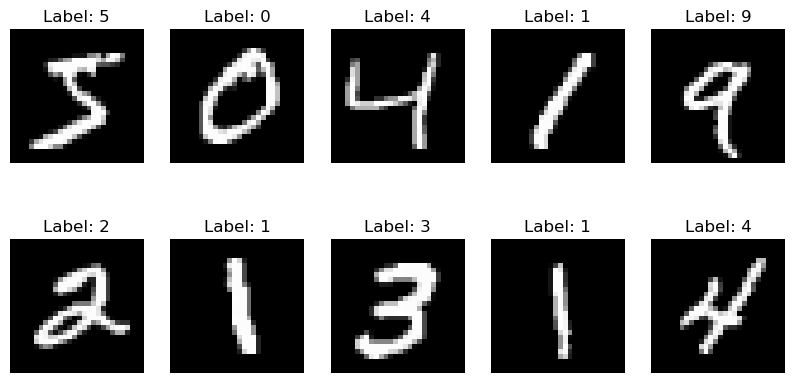

In [9]:
# Plot sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

In [11]:
# c. Define CNN Model Architecture (modified / deeper version)
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),  # conv layer 1
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation="relu"),  # conv layer 2
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation="relu"),          # fully connected layer
    Dense(10, activation="softmax")         # output layer
])

In [12]:
# Compile model
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# d. Train Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2
)

Epoch 1/10
1875/1875 - 55s - 29ms/step - accuracy: 0.9401 - loss: 0.1927 - val_accuracy: 0.9768 - val_loss: 0.0714
Epoch 2/10
1875/1875 - 81s - 43ms/step - accuracy: 0.9824 - loss: 0.0560 - val_accuracy: 0.9866 - val_loss: 0.0403
Epoch 3/10
1875/1875 - 83s - 44ms/step - accuracy: 0.9880 - loss: 0.0372 - val_accuracy: 0.9872 - val_loss: 0.0393
Epoch 4/10
1875/1875 - 53s - 28ms/step - accuracy: 0.9911 - loss: 0.0276 - val_accuracy: 0.9883 - val_loss: 0.0337
Epoch 5/10
1875/1875 - 80s - 43ms/step - accuracy: 0.9932 - loss: 0.0223 - val_accuracy: 0.9906 - val_loss: 0.0281
Epoch 6/10
1875/1875 - 86s - 46ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9908 - val_loss: 0.0284
Epoch 7/10
1875/1875 - 56s - 30ms/step - accuracy: 0.9956 - loss: 0.0137 - val_accuracy: 0.9913 - val_loss: 0.0311
Epoch 8/10
1875/1875 - 81s - 43ms/step - accuracy: 0.9964 - loss: 0.0109 - val_accuracy: 0.9912 - val_loss: 0.0307
Epoch 9/10
1875/1875 - 53s - 28ms/step - accuracy: 0.9976 - loss: 0.0083 - val_a

In [14]:
# e. Evaluate Model
score = model.evaluate(X_test, y_test, verbose=0)
print("\nTest Loss:", score[0])
print("Test Accuracy:", score[1])


Test Loss: 0.02663721889257431
Test Accuracy: 0.9919999837875366


In [15]:
# Predictions on test set
predictions = np.argmax(model.predict(X_test), axis=-1)
print("Sklearn Accuracy:", accuracy_score(y_test, predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Sklearn Accuracy: 0.992


In [16]:
# Plot accuracy and loss curves
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Training vs Validation Accuracy')

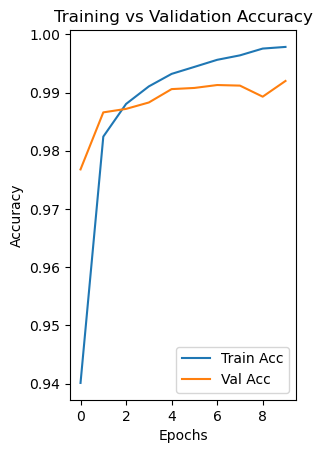

In [17]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend()
plt.title("Training vs Validation Accuracy")

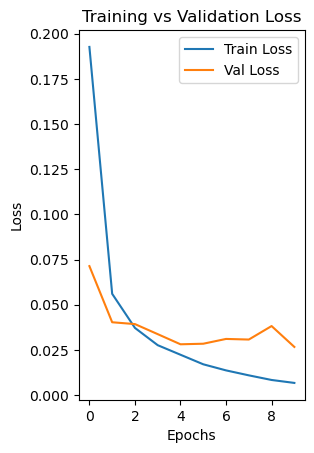

In [18]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.legend()
plt.title("Training vs Validation Loss")

plt.show()